In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.rcParams['text.usetex'] = True
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14

import warnings
warnings.filterwarnings("ignore")

from zwad.ad.preprocess import load_dataset
from zwad.ad.postprocess import load_ad_tables_by_patterns
from zwad.utils import latex_feature_names, load_data

In [2]:
with open('../data/feature_m31.name') as fh:
    names = fh.read().splitlines()
dtype = [(name, np.float32) for name in names]
data = np.concatenate([
    np.memmap('../data/feature_{}.dat'.format(field), dtype=dtype)
    for field in ('m31', 'deep', 'disk',)
])

X = pd.DataFrame(data=data)
X.rename(columns=latex_feature_names('../data/latex_feature_names.csv'), inplace=True)
X

,Amplitude,Beyond 1~Standard Deviation,Beyond 2~Standard Deviations,Cusum,$\eta$,$\eta^e$,Inter-percentile range~25\%,Inter-percentile range~10\%,Kurtosis,Linear Fit Slope,...,Periodogram Cusum,Periodogram $\eta$,Periodogram Inter-percentile range,Periodogram Standard Deviation,Periodogram Percent Amplitude,Reduced~$\chi^2$,Skew,Standard Deviation,Stetson~$K$,Weighted Mean
0,0.699500,0.227941,0.036765,0.128972,1.576097,4.729054e+09,0.212000,0.450199,3.944156,-0.001640,...,0.148243,0.038084,0.959692,1.045485,9.733143,1.391858,-1.312442,0.202145,0.664184,20.516939
1,0.443000,0.288889,0.044444,0.179944,1.524735,3.644123e+09,0.204000,0.400000,0.133404,-0.000005,...,0.156987,0.032495,0.875076,0.984689,10.104938,0.548229,-0.357512,0.163288,0.792986,20.698317
2,0.589499,0.280000,0.032000,0.191169,1.652675,2.317022e+09,0.204500,0.484001,1.439840,0.000048,...,0.144973,0.031337,0.856762,0.939969,7.261847,0.791332,-0.746378,0.190502,0.728758,20.749649
3,0.604000,0.261745,0.053691,0.158801,1.574722,1.996893e+09,0.203499,0.433001,1.735631,0.000804,...,0.159723,0.033665,0.761747,0.886971,8.016976,0.915853,-0.816090,0.178804,0.737000,20.493862
4,0.825500,0.196203,0.025316,0.085341,1.951849,2.571876e+09,0.155001,0.323599,18.212532,-0.002264,...,0.176922,0.049399,0.618860,0.638475,5.355614,1.734685,-2.598536,0.162091,0.504324,20.329548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254717,0.134999,0.261194,0.052239,0.074626,1.939203,3.478263e+11,0.038000,0.090500,1.905449,0.000004,...,0.204491,0.024706,0.661476,0.982081,14.566538,8.745687,-0.273337,0.037209,0.726424,16.256903
2254718,0.354500,0.315789,0.044892,0.068742,2.002020,3.240108e+11,0.130999,0.260000,0.215598,-0.000283,...,0.159282,0.024428,0.763629,0.731055,7.406523,1.563799,-0.021221,0.100870,0.791641,19.259731
2254719,0.355000,0.294753,0.050926,0.045662,1.968179,3.700885e+11,0.129000,0.260000,0.810251,0.000067,...,0.154592,0.041831,0.691424,0.706343,6.929576,1.593399,-0.093009,0.102527,0.761554,19.280340
2254720,0.217500,0.282511,0.043348,0.043773,1.984369,4.224671e+11,0.075249,0.151600,0.663024,-0.000127,...,0.169853,0.021363,0.733726,0.743227,7.366379,1.184451,0.327773,0.059975,0.778571,18.675014


In [3]:
scaler = StandardScaler()

feature_col=X.columns[0:41]
X_norm = scaler.fit_transform(X[feature_col])
pd.DataFrame(X_norm)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2.247677,-2.477270,-1.455884,1.078002,-1.215405,-1.812573,1.436235,1.650503,0.321106,-4.996948,...,-0.901114,-0.700652,0.607947,2.921488,0.164810,-0.196237,-0.028482,-2.244305,1.983407,-3.522954
1,0.909702,-0.158690,-0.448601,2.287191,-1.451447,-1.819809,1.333625,1.323187,-0.164981,0.154067,...,0.517405,-0.325077,0.166040,1.735814,0.079759,-0.176313,-0.071482,-0.686557,1.354849,0.575120
2,1.673884,-0.496842,-2.080829,2.553496,-0.863482,-1.828659,1.340035,1.870902,0.001664,0.320516,...,-0.218985,-0.841115,0.074488,1.479186,0.017199,-0.328673,-0.059091,-1.320902,1.795071,-1.468396
3,1.749523,-1.191302,0.764225,1.785617,-1.221726,-1.830794,1.327191,1.538363,0.039394,2.704666,...,0.548411,-0.207557,0.258557,0.147807,-0.056942,-0.288206,-0.052744,-1.434621,1.605829,-1.206172
4,2.904924,-3.684675,-2.957451,0.042952,0.511410,-1.826960,0.705100,0.825033,2.141131,-6.964908,...,0.056192,0.531194,1.502561,-1.854382,-0.404572,-0.430828,-0.011008,-4.342271,1.335475,-8.609141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254717,-0.696911,-1.212262,0.573717,-0.211240,0.453295,0.475564,-0.795677,-0.694840,0.061055,0.183507,...,-0.189311,1.715319,-0.449730,-1.257223,0.076112,0.062783,0.346344,-0.549245,-0.684651,-1.542662
2254718,0.448062,0.864664,-0.389946,-0.350838,0.741977,0.316737,0.397224,0.410351,-0.154496,-0.722293,...,0.641670,-0.226509,-0.471698,0.174171,-0.275059,-0.320920,-0.019718,-0.137976,0.345158,0.532307
2254719,0.450674,0.064396,0.401518,-0.898358,0.586456,0.624032,0.371583,0.410351,-0.078644,0.381615,...,0.799122,-0.427960,0.904225,-0.837589,-0.309629,-0.346479,-0.018209,-0.255081,0.371959,-0.424939
2254720,-0.266567,-0.401311,-0.592375,-0.943163,0.660861,0.973349,-0.317886,-0.296450,-0.097424,-0.229158,...,1.211525,0.227542,-0.714087,-0.244830,-0.258031,-0.323071,-0.039054,0.431327,-0.316380,0.116478


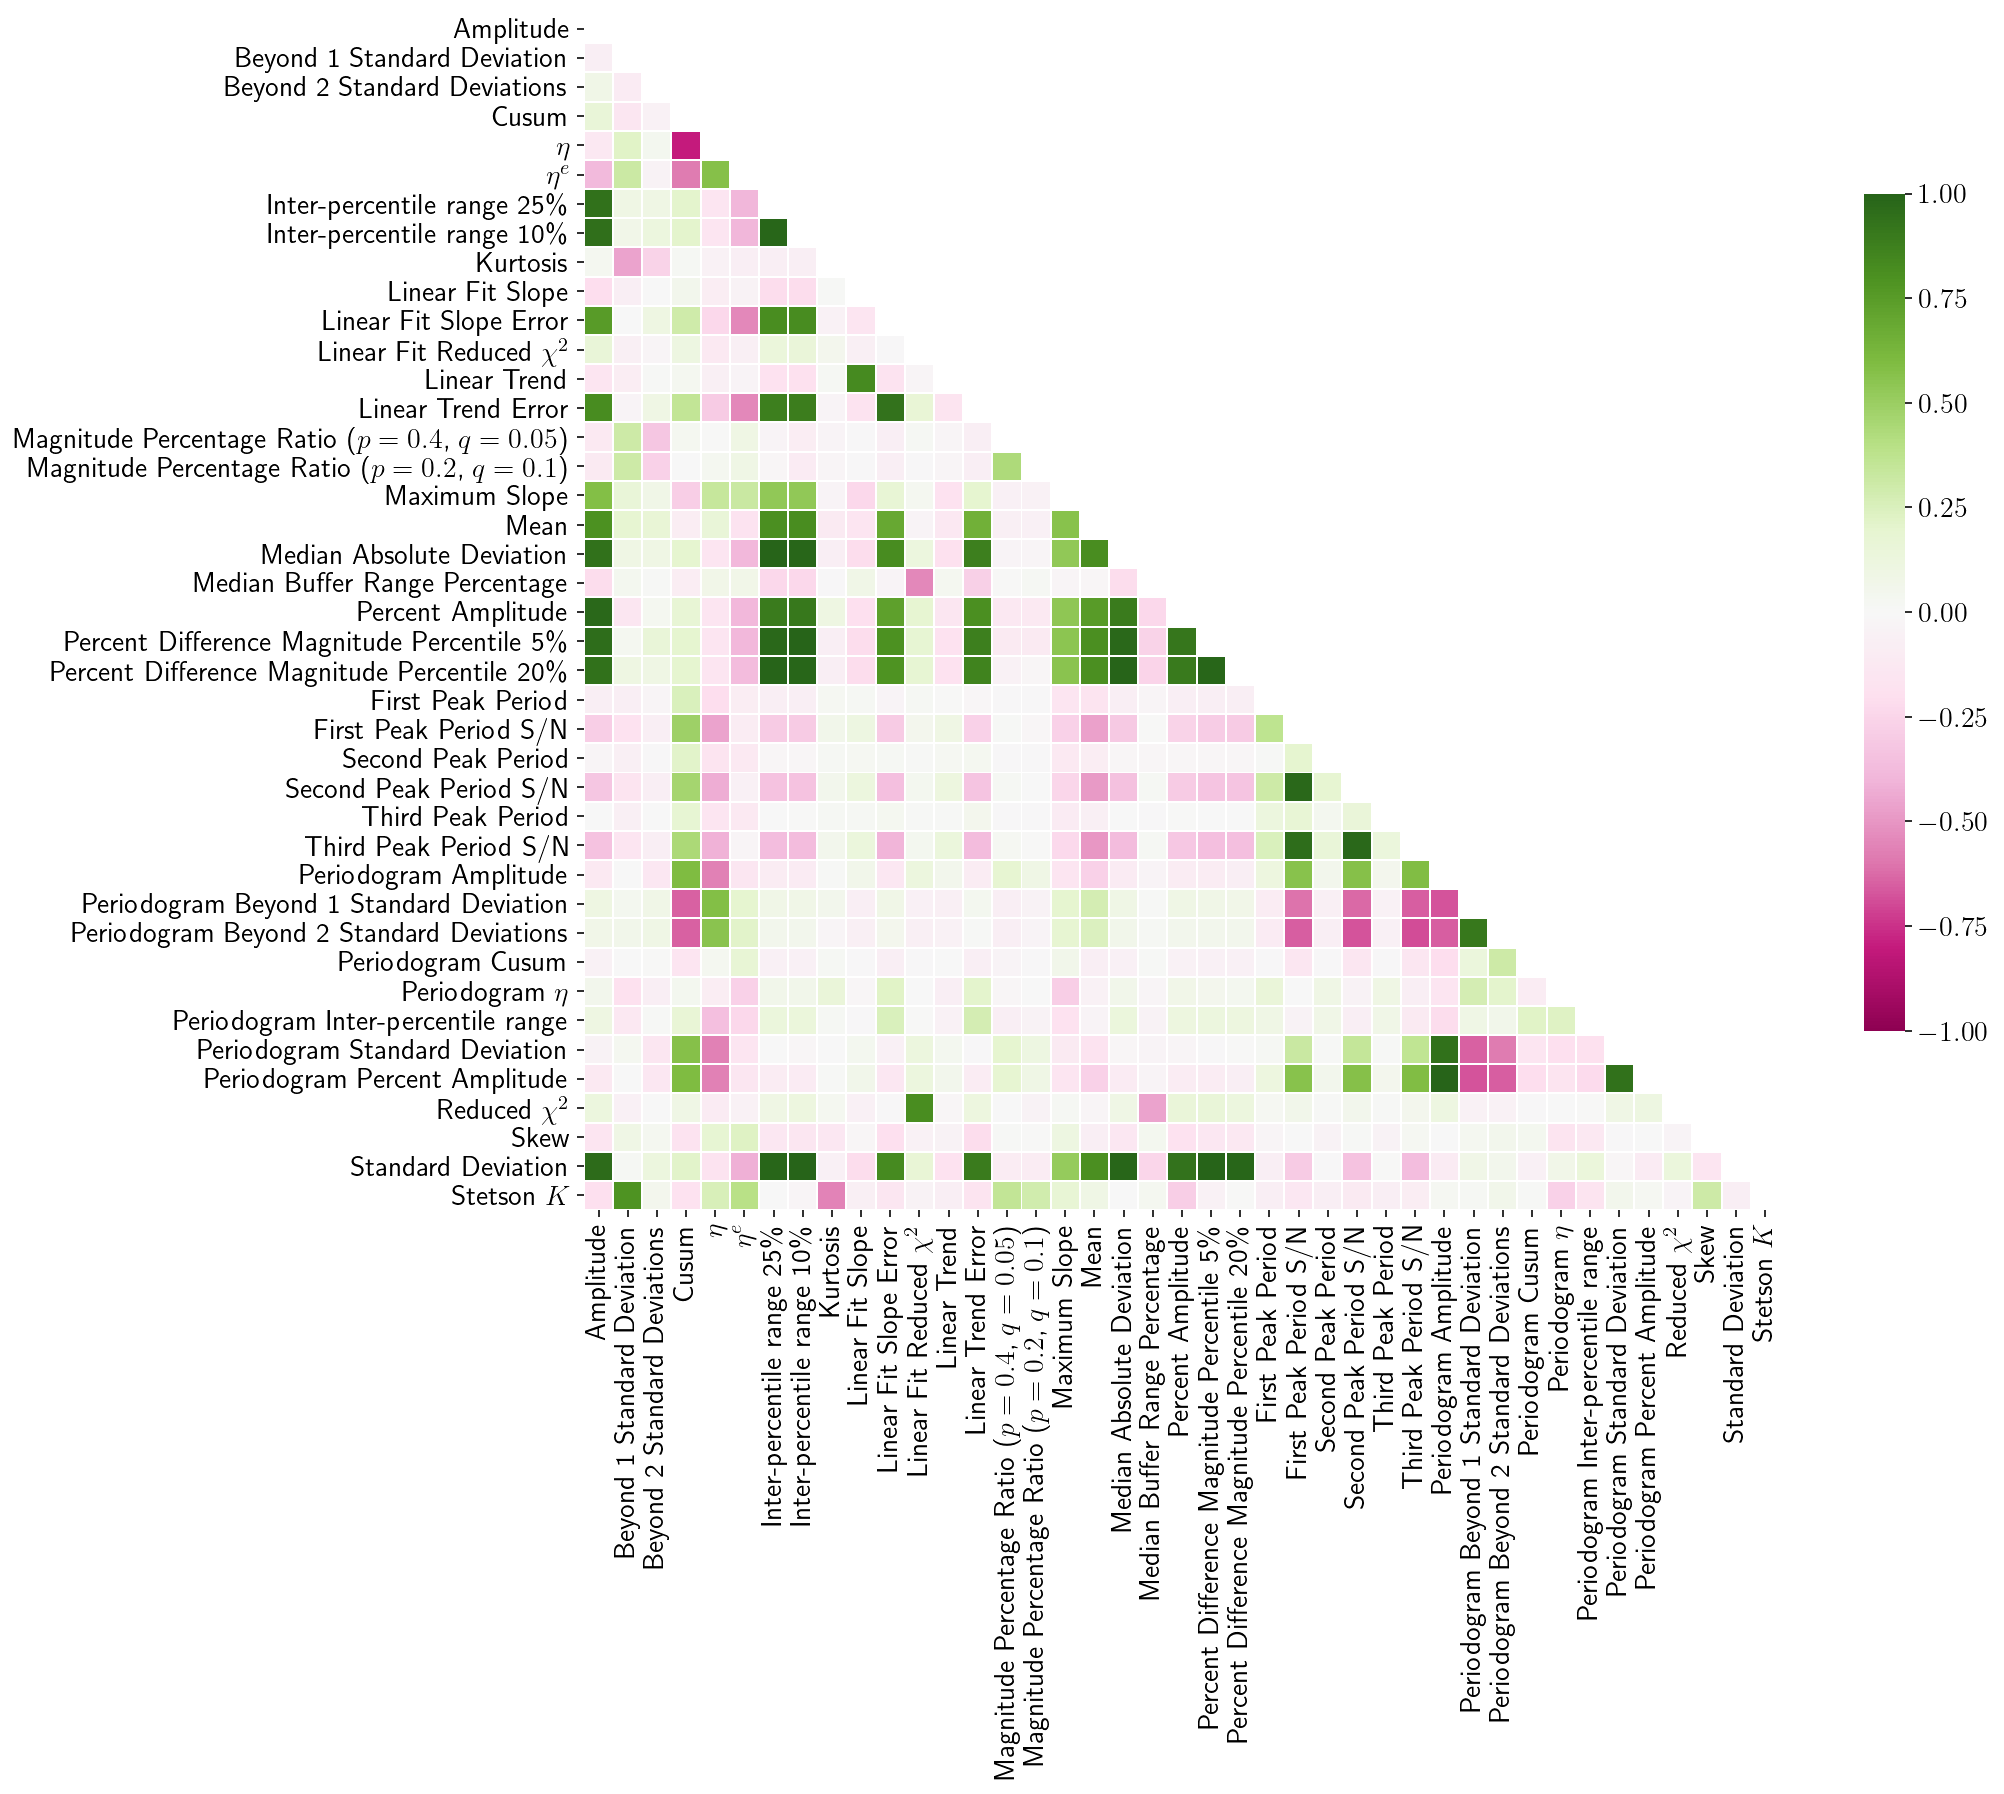

In [4]:
d = pd.DataFrame(data=X_norm, columns=list(feature_col))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='PiYG', annot=False, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

ax.set_xticklabels(list(feature_col), rotation=90);

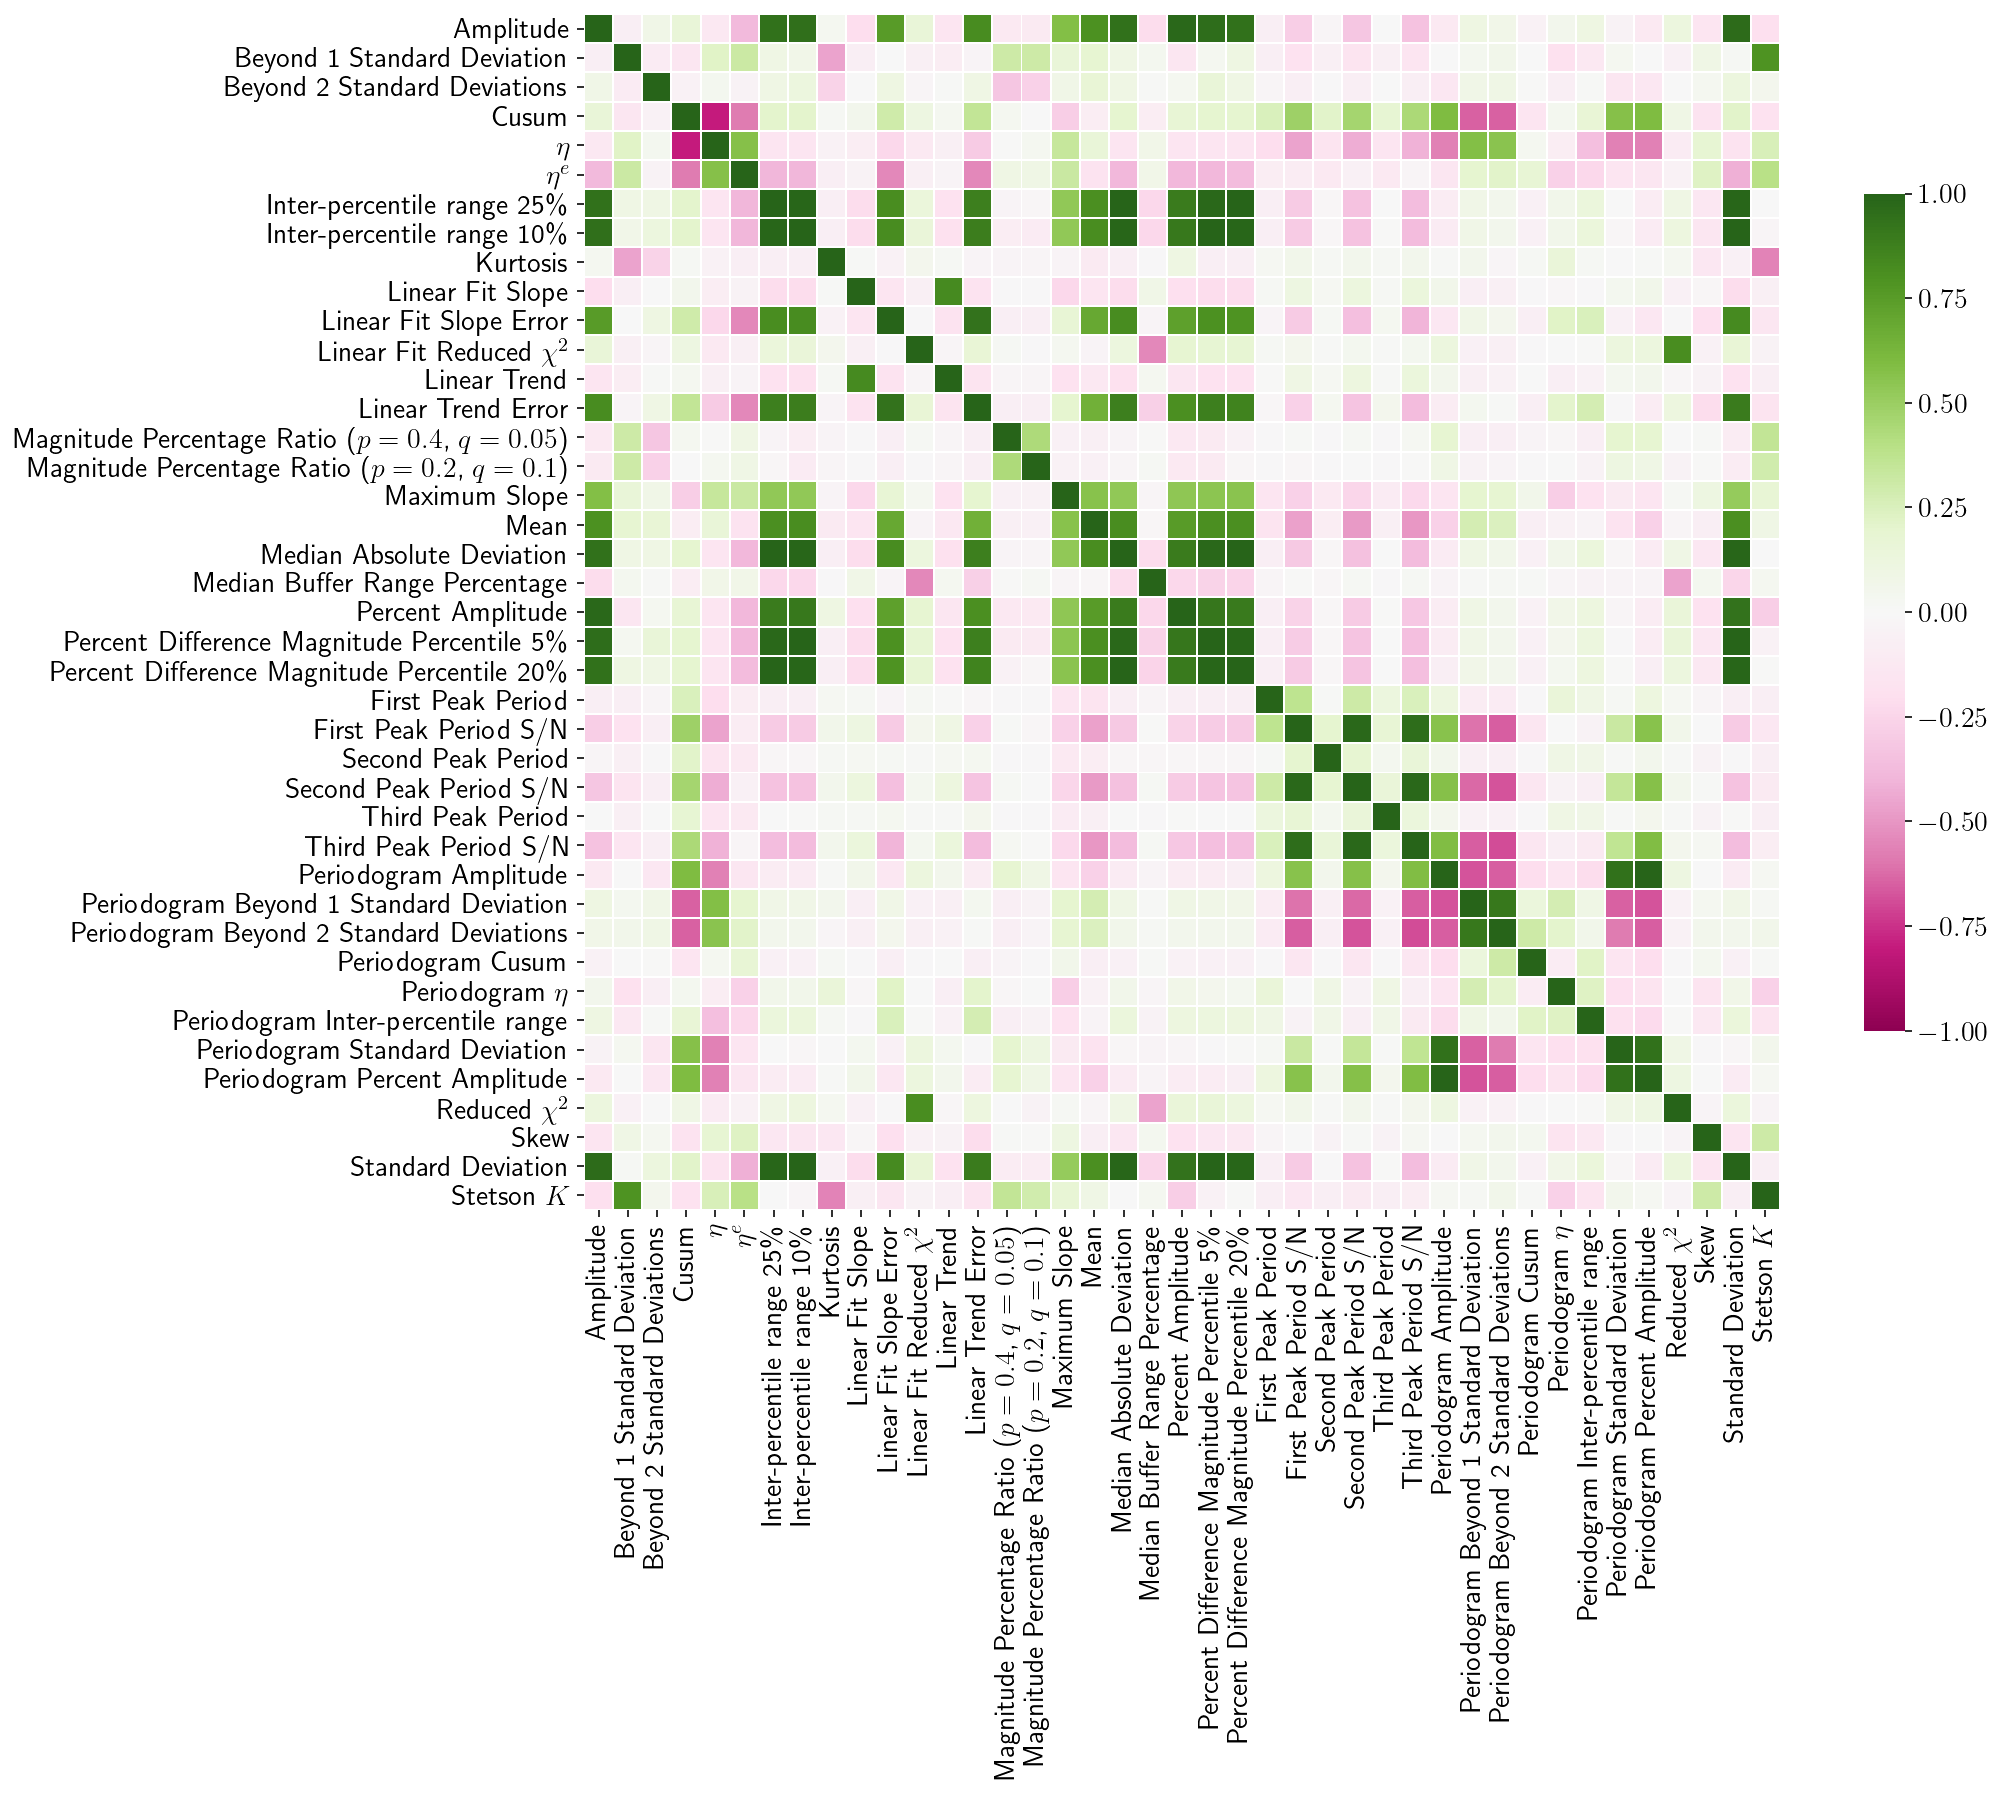

In [5]:
d = pd.DataFrame(data=X_norm, columns=list(feature_col))

# Compute the correlation matrix
corr = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='PiYG', annot=False, vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

ax.set_xticklabels(list(feature_col), rotation=90);

plt.savefig('../figs/misc/correlation_matrix_all_fields.pdf', bbox_inches='tight')